In [1]:
!pip install pyforest 

  Preparing metadata (setup.py) ... - done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=b7d2864c3b8b021ebdc6ec0fd3faf2f754e1dcbb9d751af2eb3912cbefc51715
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


### Importing libraries

In [2]:
import pyforest
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

### Importing Data 

In [3]:
df= pd.read_csv('/kaggle/input/housedata/data.csv',index_col=0)
df.head()

<IPython.core.display.Javascript object>

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [5]:
df1=df.drop(labels=['waterfront', 'view'], axis=1)

In [6]:
df1.shape

(4600, 15)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 2014-05-02 00:00:00 to 2014-07-10 00:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   condition      4600 non-null   int64  
 7   sqft_above     4600 non-null   int64  
 8   sqft_basement  4600 non-null   int64  
 9   yr_built       4600 non-null   int64  
 10  yr_renovated   4600 non-null   int64  
 11  street         4600 non-null   object 
 12  city           4600 non-null   object 
 13  statezip       4600 non-null   object 
 14  country        4600 non-null   object 
dtypes: float64(4), int64(7), object(4)
memory usage: 575.0+ KB


### Checking null values and duplicates

In [8]:
df1.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
df1.duplicated().sum()

0

### Exploratory data analysis

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0
sqft_basement,4600.0,312.081522,464.137228,0.0,0.00,0.000000,610.00,4820.0
yr_built,4600.0,1970.786304,29.731848,1900.0,1951.00,1976.000000,1997.00,2014.0


<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


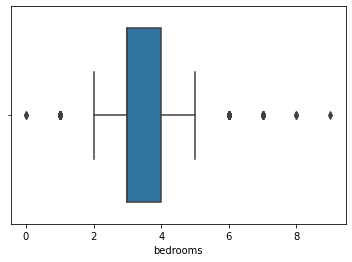

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


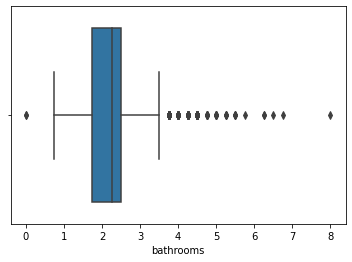

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


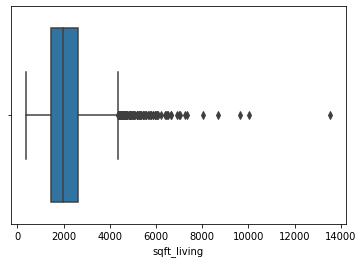

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


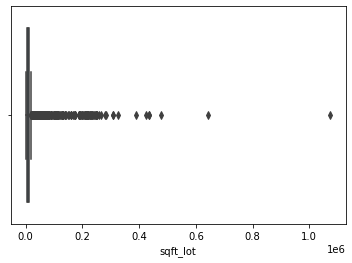

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


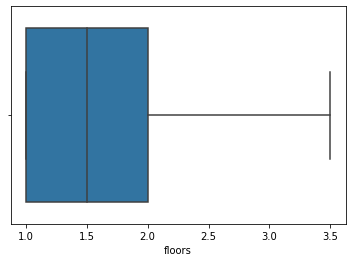

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


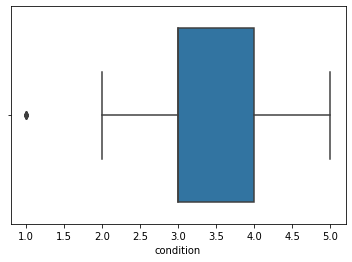

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


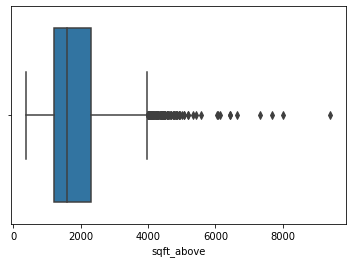

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


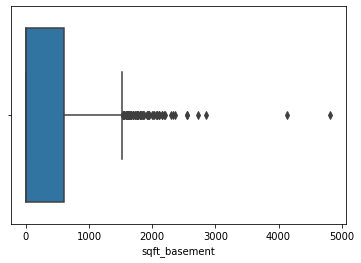

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


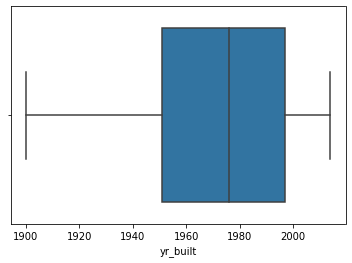

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


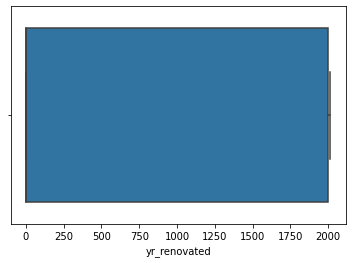

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


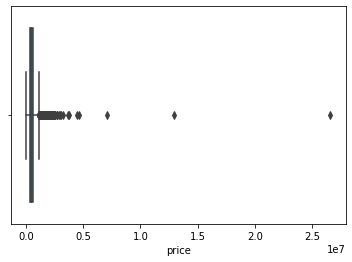

In [11]:
cols = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors','condition',
        'sqft_above', 'sqft_basement','yr_built', 'yr_renovated','price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### Removing Outliers

In [12]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


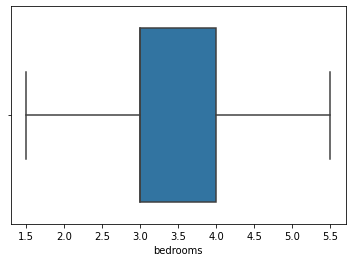

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


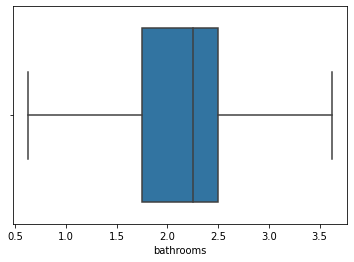

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


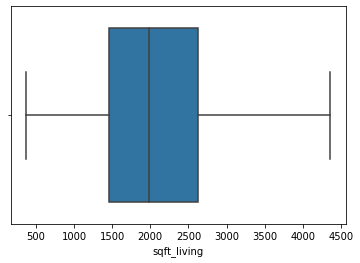

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


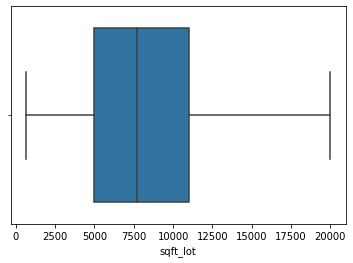

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


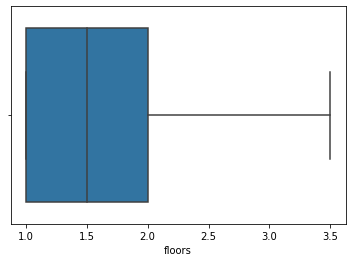

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


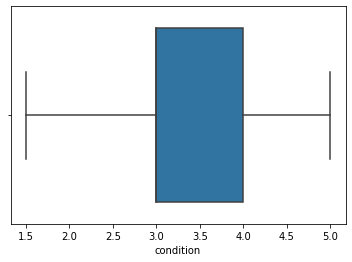

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


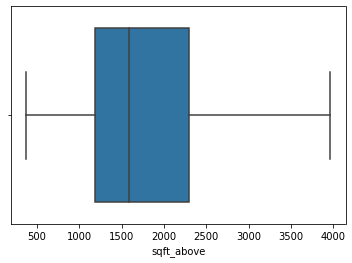

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


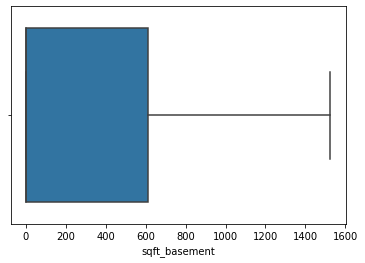

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


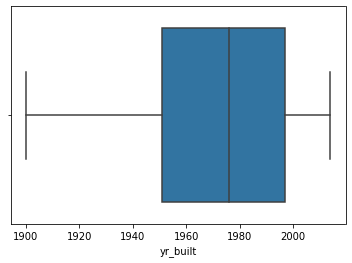

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


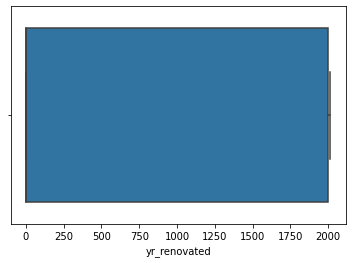

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


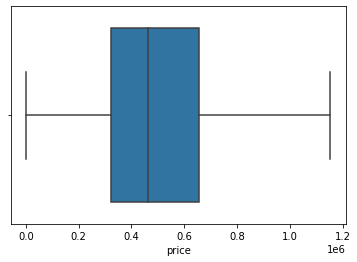

In [14]:
cols = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors','condition',
        'sqft_above', 'sqft_basement','yr_built', 'yr_renovated','price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

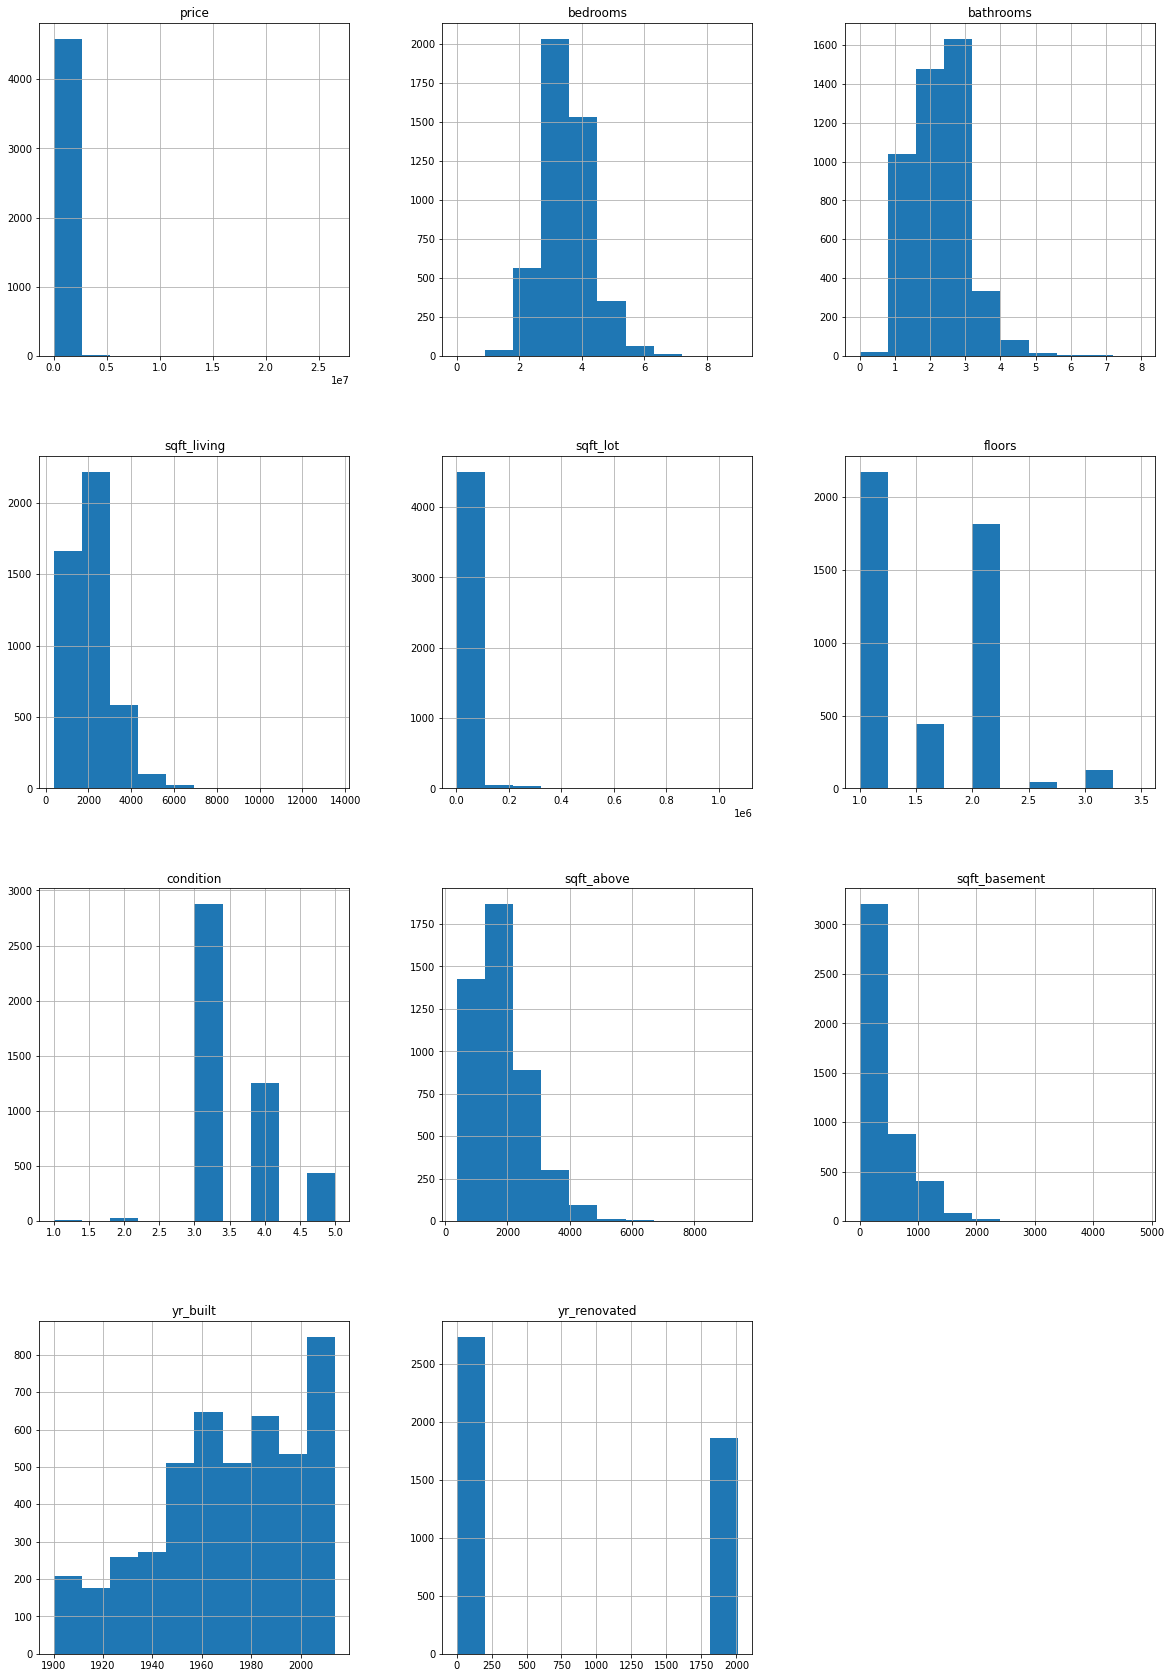

In [15]:
df1.hist(figsize=(20,30));

In [16]:
df1.skew()

/opt/conda/lib/python3.7/site-packages/pyforest/__init__.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # -*- coding: utf-8 -*-


price            24.790933
bedrooms          0.456447
bathrooms         0.616033
sqft_living       1.723513
sqft_lot         11.307139
floors            0.551441
condition         0.959068
sqft_above        1.494211
sqft_basement     1.642732
yr_built         -0.502155
yr_renovated      0.385919
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

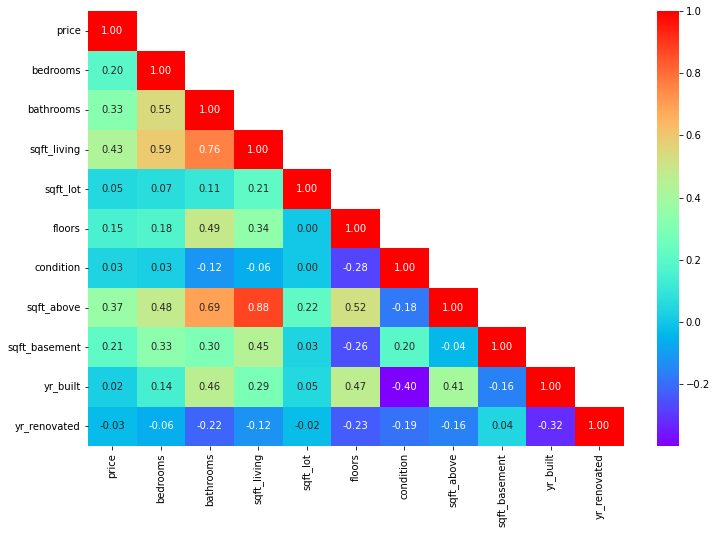

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df1.corr(),+1))
plt.show()

### Linear Regression model without categorical columns

In [18]:
X = df1[['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','floors',]]
y = df1['price']

In [19]:
X_train, X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [20]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

<IPython.core.display.Javascript object>

              Coefficient
bedrooms    -56582.982767
bathrooms    13876.899604
sqft_living    308.143278
sqft_lot        -0.665671
sqft_above     -33.800644
floors        2259.826250


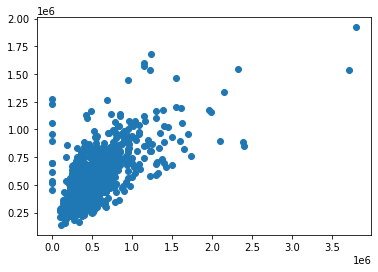

In [22]:
predictions = lr.predict(X_test)
plt.scatter(Y_test,predictions)

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

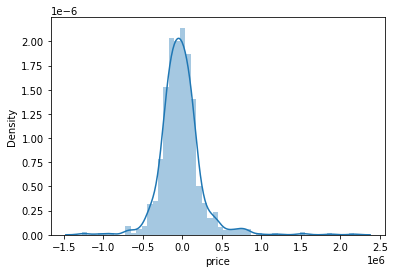

In [23]:
sns.distplot((Y_test-predictions), bins=50)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 174688.3908802762
Mean Squared Error: 69357053732.25664


<IPython.core.display.Javascript object>

Root Mean Squared Error: 263357.27393078903


In [25]:
X = df[['street','statezip','city','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','floors',]]
y = df['price']

In [26]:
from category_encoders import MEstimateEncoder

In [27]:
encoder = MEstimateEncoder(cols=['street','statezip','city'],m=0.5)
encoder.fit(X,y)
X_transformed = encoder.transform(X)

In [28]:
X_transformed

,street,statezip,city,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors
date,,,,,,,,,
2014-05-02 00:00:00,380997.768414,375195.586303,409173.643161,3.0,1.50,1340.0,7912.0,1340.0,1.5
2014-05-02 00:00:00,941060.268414,788416.977831,546380.248504,5.0,2.50,3650.0,9050.0,3370.0,2.0
2014-05-02 00:00:00,400331.101747,310806.838406,302575.162601,3.0,2.00,1930.0,11947.0,1930.0,1.0
2014-05-02 00:00:00,452331.101747,560315.503022,750011.154692,3.0,2.25,2000.0,8030.0,1000.0,1.0
2014-05-02 00:00:00,538997.768414,632433.256585,657240.931321,4.0,2.50,1940.0,10500.0,1140.0,1.0
...,...,...,...,...,...,...,...,...,...
2014-07-09 00:00:00,377775.546192,375195.586303,546380.248504,3.0,1.75,1510.0,6360.0,1510.0,1.0
2014-07-09 00:00:00,528553.323969,635636.043948,750011.154692,3.0,2.50,1460.0,7573.0,1460.0,2.0
2014-07-09 00:00:00,450267.212858,498657.237409,377279.385986,3.0,2.50,3010.0,7014.0,3010.0,2.0


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_transformed.values,y.values,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regressor = LinearRegression()

In [32]:
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(x_test)

In [34]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

<IPython.core.display.Javascript object>

array([[289000.        , 291597.22470974],
       [429900.        , 431423.40717369],
       [129000.        , 128681.32492922],
       ...,
       [ 83300.        ,  83917.24637983],
       [520000.        , 521337.89742158],
       [215000.        , 214496.0146468 ]])

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3070.599925145078
294074748.0195043
0.9956666839383742


In [37]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(regressor,x_train,y_train,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cvs.std()*100))

Accuracy: 99.70 %
Standard Deviation: 0.30 %


### Using XGBoost 

In [38]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [39]:
train_X, test_X, train_y, test_y = train_test_split(X_transformed, y,
                      test_size = 0.3, random_state = 123)


In [40]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [41]:
xgb_r.fit(train_X, train_y)

[10:51:27] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [42]:
pred = xgb_r.predict(test_X)
  

In [43]:

rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

<IPython.core.display.Javascript object>

RMSE :  22204.068051
